In [41]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [42]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [43]:
df = pd.read_csv("clean_superstore_dataset.csv", encoding='latin1')

df.head()

,Row_ID,Order_Date,Sales,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,15100992000,261.9600,259200.0,166,193,15,215,12,False,...,False,False,False,False,False,False,False,False,False,False
1,2,15100992000,731.9400,259200.0,166,193,15,215,55,False,...,False,False,False,False,False,False,False,False,False,False
2,3,14972256000,14.6200,345600.0,201,264,3,512,943,False,...,False,False,False,True,False,False,False,False,False,False
3,4,14761440000,957.5775,604800.0,687,152,8,168,319,False,...,False,False,False,False,False,False,False,False,False,True
4,5,14761440000,22.3680,604800.0,687,152,8,168,1313,False,...,False,False,False,False,False,False,False,True,False,False


pp = df[["Postal_Code_encoded","State_encoded", "Category_furniture", "Category_office supplies","Category_technology", "Sales"]]

In [44]:
pp

,Postal_Code_encoded,State_encoded,Category_furniture,Category_office supplies,Category_technology,Sales
0,215,15,True,False,False,261.9600
1,215,15,True,False,False,731.9400
2,512,3,False,True,False,14.6200
3,168,8,True,False,False,957.5775
4,168,8,False,True,False,22.3680
...,...,...,...,...,...,...
9552,343,11,False,True,False,3.7980
9553,223,33,False,True,False,10.3680
9554,223,33,False,False,True,235.1880
9555,223,33,False,False,True,26.3760


In [45]:
from sklearn.model_selection import train_test_split

X = pp.drop("Sales", axis = 1)
y = pp["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [46]:
X.head()

,Postal_Code_encoded,State_encoded,Category_furniture,Category_office supplies,Category_technology
0,215,15,True,False,False
1,215,15,True,False,False
2,512,3,False,True,False
3,168,8,True,False,False
4,168,8,False,True,False


In [47]:
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9552      3.7980
9553     10.3680
9554    235.1880
9555     26.3760
9556     10.3840
Name: Sales, Length: 9557, dtype: float64

In [48]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state = 42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
y_pred = model.predict(X_test)
y_pred

array([ 98.34607 ,  64.563515, 133.92442 , ..., 197.57484 ,  54.113735,
       187.16472 ], shape=(1912,), dtype=float32)

In [50]:
from sklearn.metrics import mean_squared_error as mse , r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 59465.806293186375
Coefficient of determination: 0.058872453367468824


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose =1, n_jobs= -1)

In [52]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits


Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}


In [53]:
best_model = XGBRegressor(colsample_bytree = 1.0 , learning_rate = 0.01, max_depth = 3 , n_estimators = 200, reg_alpha = 0, reg_lambda = 1, subsample = 1.0)
best_model.fit(X_train, y_train)
y_pred2 = best_model.predict(X_test)

print(f"Mean squared error: {mse(y_test, y_pred2)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred2)}")

Mean squared error: 55162.36335872671
Coefficient of determination: 0.12698031136930654


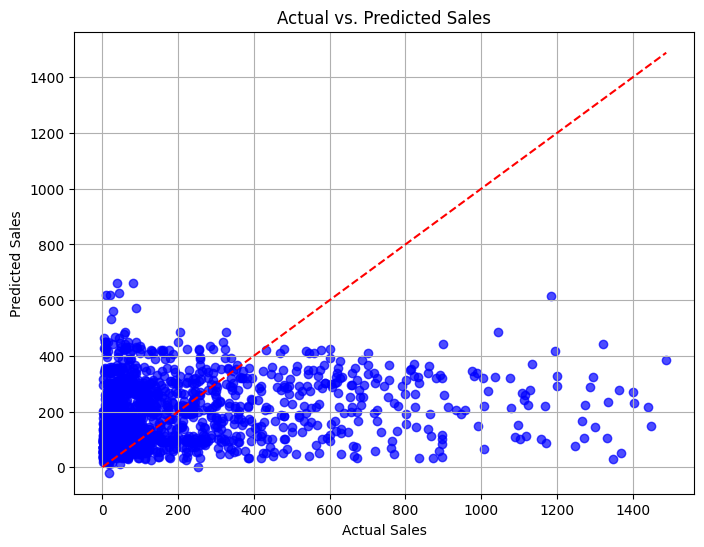

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

In [55]:
residuals = y_test - y_pred

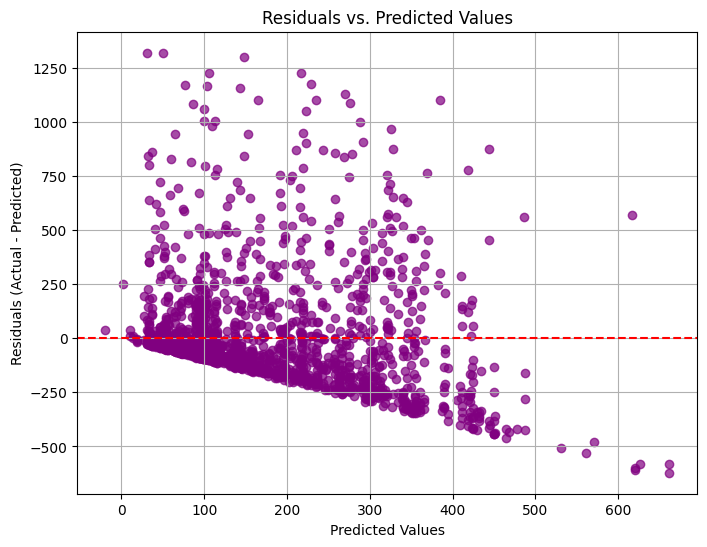

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()

In [57]:
os.chdir("../models")
print(os.getcwd())

/workspaces/4Geeks_final_project/models


In [61]:
import pickle

with open("price_predictor.pkl", "wb") as f:
    pickle.dump(best_model, f)